In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import set_config
from xgboost import XGBRegressor

In [60]:
#pip install xgboost

In [61]:
def read_csv(file_path):
    """
    Read data from CSV file and return a pandas Dataframe.
    Parameter:
    -file_path: str,the path to the CSV file.
    returns:
    -pd.DataFrame,the loaded DataFrame.
    """
    return pd.read_csv(file_path)

def dataset_info_statistics(data):
    """
    Display infromation and basic statistics about the dataset.
    Parameters:
    -data: pandas dataframe, input data.
    Returns: 
    -None"""
    
    #display general information about the dataset
    print("Dataset Information")
    print(data.info())
    print("/n")
    
    #display basic statistics for numerical column
    print("Basic Statistics for numerical column")
    print(data.describe())
    print("/n")
    
def plot_graph(data):
    """
    plot graphs for numerical and categorical data in a dataframe.
    parameters: Pandas Dataframe , input data.
    Returns:
    -None"""
    num_column=data.select_dtypes(include=np.number).columns
    for column in num_column:
        plt.figure(figsize=(5,3))
        sns.displot(data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    cat_column=data.select_dtypes(include="object").columns
    for column in cat_column:
        plt.figure(figsize=(5,3))
        sns.countplot(data[column])
        plt.title(f"Countplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

#check for the null values in the dataset
def check_null(data):
    """
    check for all values in the dataset
    Parameters:Pandas Dataframe, input Data.
    Returns:
    -pd.series,the count of null values for each column"""
    null_counts=data.isnull().sum()
    print("Null values in the Dataset:")
    return null_counts

#check for duplicate values in the dataset
def check_duplicates(data):
    """
    check for duplicated rows in the daatset.
    Parameters: Pandas Dataframe, input data.
    Returns:
    -bool,True if any duplicated rows exist, False otherwise."""
    return data.duplicated().sum()

def sep_features_target(data,target_column):
    """
    Separate features and target variable
    Parameters:
    -data:Pandas dataframe, input data.
    -target_column :str,the column representing the target variables
    Returns:
    -x: Pandas DataFrame ,features.
    -y:Pandas Series ,target variable
    """
    x=data.drop(columns=[target_column],axis=1)
    y=data[target_column ]
    return x,y

def perform_train_test_split(x,y,test_size=0.2,random_state=42):
    """
    Perform train test split
    
    Parameters:
    -x: Pandas Dataframe ,featurs.
    -y:pandas Series,target variable.
    -test_size: float,optional, the propertion of the dataset to include in the test split
    (default is 0.20)
    -random_state:int,optional,seed for random generation( defulat 42)
    
    Returns:
    -x_train:Pandas Dataframe, features for training.
    -x_test:Pandas Dataframe, features for testing.
    -y_train:pandas series,target variable for training.
    -y_test:pandas series, target variable for testing."""

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=random_state)
    return x_train,x_test,y_train,y_test

In [62]:
#press shift+tab after placing curser inside paranthesis to excute read_csv function
calories=pd.read_csv("calories.csv")
exercise=pd.read_csv("exercise.csv")


In [63]:
exercise

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]

In [64]:
df=pd.merge(exercise,calories,on="User_ID")

In [65]:
df
#height in cm, weight in kg, duratoion in minutes,normal  heart_rate betweeen 60-100, body temperate celcius. 

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

In [66]:
dataset_info_statistics(df)

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None
/n
Basic Statistics for numerical column
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203 

In [67]:
check_null(df)

Null values in the Dataset:


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [68]:
check_duplicates(df)

0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

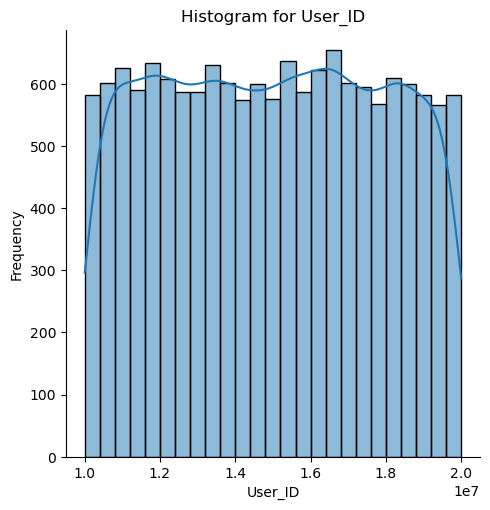

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

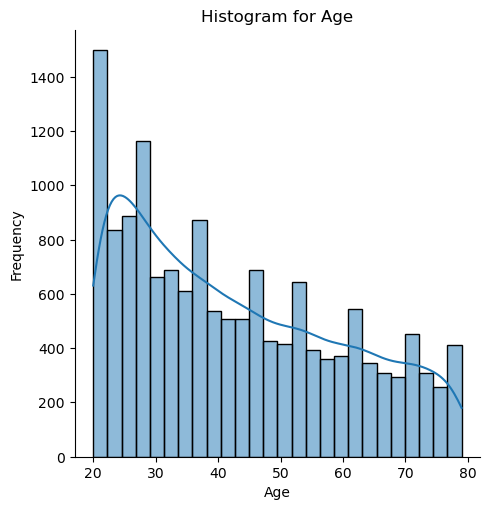

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

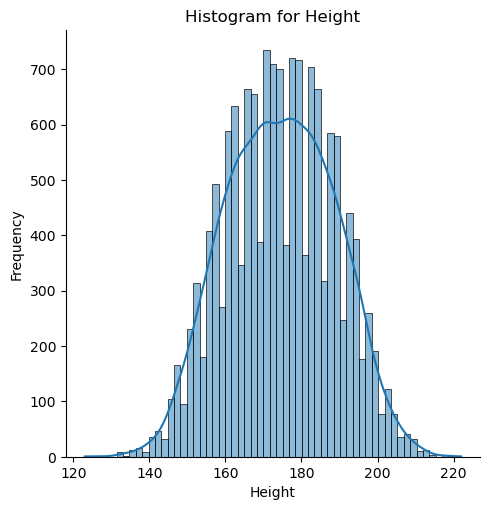

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

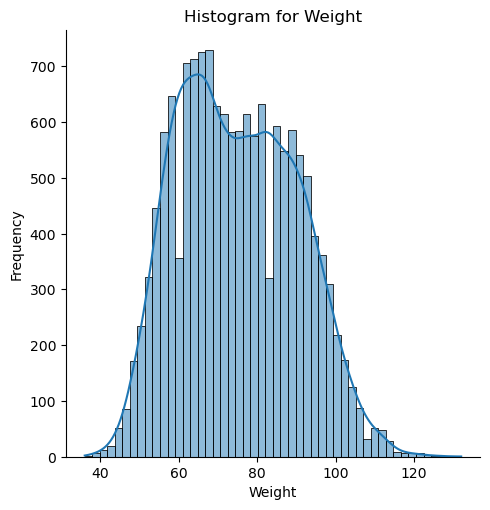

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

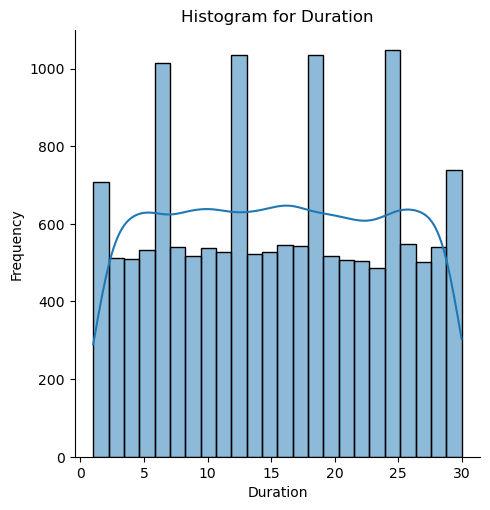

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

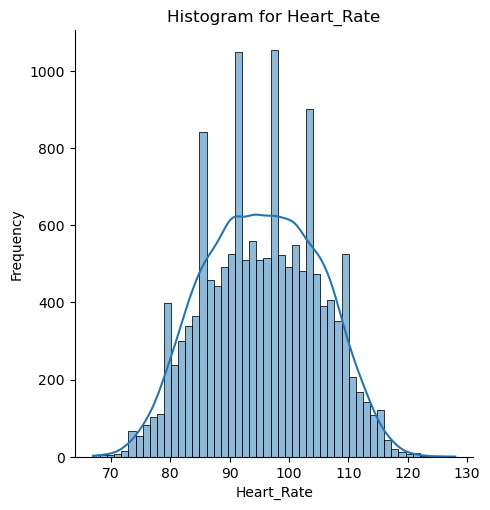

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

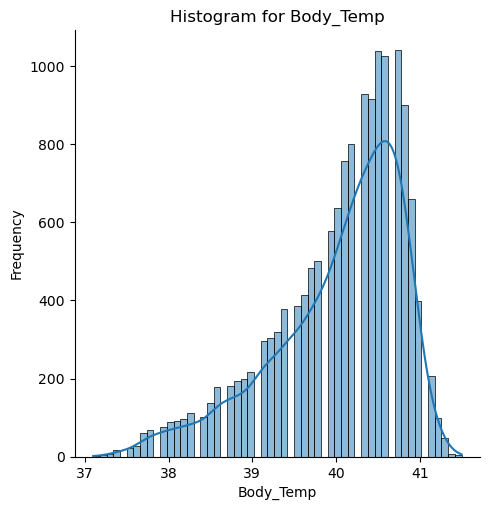

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

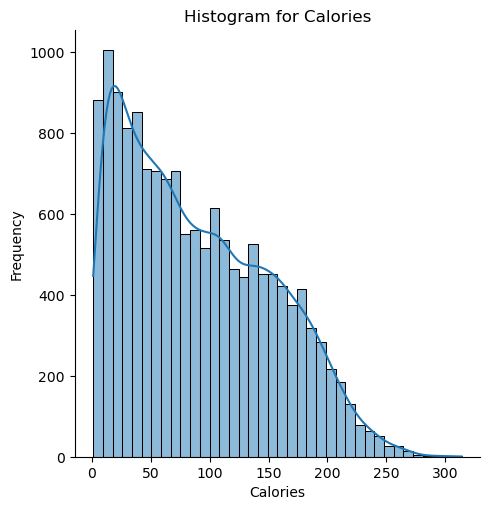

ValueError: could not convert string to float: 'male'

<Figure size 500x300 with 0 Axes>

In [69]:
plot_graph(df)  

In [70]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [71]:
x,y=sep_features_target(df,"Calories")
x

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]

In [72]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [73]:
x=x.drop(columns=['User_ID'],axis=1)


In [74]:
x

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0        male   68   190.0    94.0      29.0       105.0       40.8
1      female   20   166.0    60.0      14.0        94.0       40.3
2        male   69   179.0    79.0       5.0        88.0       38.7
3      female   34   179.0    71.0      13.0       100.0       40.5
4      female   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995  female   20   193.0    86.0      11.0        92.0       40.4
14996  female   27   165.0    65.0       6.0        85.0       39.2
14997  female   43   159.0    58.0      16.0        90.0       40.1
14998    male   78   193.0    97.0       2.0        84.0       38.3
14999    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]

In [75]:
x_train,x_test,y_train,y_test=perform_train_test_split(x,y)
x_train

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
9839     male   37   179.0    77.0       7.0        81.0       39.5
9680     male   23   195.0    87.0      26.0       110.0       40.5
7093     male   33   181.0    77.0      12.0        88.0       40.1
11293  female   66   156.0    54.0       9.0        77.0       39.5
820    female   32   144.0    49.0       5.0        90.0       39.0
...       ...  ...     ...     ...       ...         ...        ...
5191   female   75   148.0    51.0      22.0       104.0       40.6
13418  female   21   172.0    67.0      20.0       104.0       40.7
5390     male   57   189.0    92.0       8.0        90.0       39.5
860      male   35   174.0    76.0      12.0        97.0       40.2
7270     male   26   182.0    86.0      16.0        91.0       40.5

[12000 rows x 7 columns]

In [76]:
x.shape

(15000, 7)

In [77]:
x_train.shape

(12000, 7)

In [78]:
x_test.shape

(3000, 7)

# column transformer and pipeline

In [79]:
preprocessor=ColumnTransformer(transformers=[
    ('Cat',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','Body_Temp']),
],remainder="passthrough")

# linearRegression

In [80]:
pipeline=Pipeline([('preprocessor',preprocessor),
                  ('model',LinearRegression())])

In [81]:
set_config(display='diagram')

In [82]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [83]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [84]:
y_predict=pipeline.predict(x_test)

In [85]:
print("MAE:",mean_absolute_error(y_test,y_predict))
print("MSA:",mean_squared_error(y_test,y_predict))
print("R2 score:",r2_score(y_test,y_predict))

MAE: 8.441513553849703
MSA: 131.99574575081698
R2 score: 0.9672937151257295


In [86]:


kfold=KFold(n_splits=5,shuffle=True,random_state=42)

In [87]:
cv_results=cross_val_score(pipeline,x,y,cv=kfold,scoring='r2')


In [88]:
cv_results.mean()

0.9671402283675841

In [89]:
def model_scorer(model_name,model):
    """
    Evaluate the performance of  a machine learning model using R2 score,Mean absolute error, and
    cross validation.
    Parameters:
    -model_name:str,name for the model.
    -model: machine learning model,the model to be evaluated.
    
    Retuens:
    -output:list,containing model name,R2 score ,mean Absolute error,cross validation R2 score 
    """
    output=[]
    output.append(model_name)
    pipeline=Pipeline([('preprocessing',preprocessor),
                      ('model',model)])
    x_train,x_test,y_train,y_test= perform_train_test_split(x,y,test_size=0.2,random_state=42)
    pipeline.fit(x_train,y_train)
    y_pred=pipeline.predict(x_test)
    
    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))
    
    kfold=KFold(n_splits=5,shuffle=True,random_state=42)
    cv_results=cross_val_score(pipeline,x,y,cv=kfold,scoring='r2')
    output.append(cv_results.mean())
    return output

In [90]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}

In [91]:
from sklearn.model_selection import KFold

In [92]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [93]:
model_output

[['log', 0.9672937151257295, 8.441513553849703, 0.9671402283675841],
 ['RF', 0.998256147423326, 1.69121, 0.9979108695709487],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

# XGBregressor

In [94]:
pipeline=Pipeline([('preprocessor',preprocessor),
                  ('model',XGBRegressor())])

In [95]:
x.iloc[:,0]

0          male
1        female
2          male
3        female
4        female
          ...  
14995    female
14996    female
14997    female
14998      male
14999      male
Name: Gender, Length: 15000, dtype: object

In [96]:
sample=pd.DataFrame({
    'Gender':1,
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])

In [97]:
x_test

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
11499  female   45   154.0    52.0      26.0       107.0       40.6
6475     male   21   187.0    90.0      29.0       111.0       40.5
13167    male   58   176.0    77.0      11.0        90.0       40.0
862      male   35   182.0    89.0      24.0       108.0       40.8
5970   female   67   171.0    67.0      29.0       116.0       41.1
...       ...  ...     ...     ...       ...         ...        ...
6216   female   61   166.0    66.0      28.0       106.0       41.0
3585   female   73   165.0    66.0      10.0        92.0       40.0
10023  female   38   169.0    66.0      20.0       104.0       40.2
14044  female   25   163.0    54.0       5.0        86.0       39.2
12965    male   26   181.0    84.0      29.0       116.0       41.2

[3000 rows x 7 columns]

In [111]:
y_test


11499    173.0
6475     189.0
13167     53.0
862      161.0
5970     226.0
         ...  
6216     186.0
3585      53.0
10023    120.0
14044     20.0
12965    214.0
Name: Calories, Length: 3000, dtype: float64

In [98]:
y_train.isnull().sum()

0

In [99]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, dev...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [100]:
pipeline.predict(sample)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [101]:
y_predict=pipeline.predict(x_test)

In [102]:
print("MAE:",mean_absolute_error(y_test,y_predict))
print("MSA:",mean_squared_error(y_test,y_predict))
print("R2 score:",r2_score(y_test,y_predict))

MAE: 1.4981198125282924
MSA: 4.568956111227719
R2 score: 0.9988678909361673


# RandomForestRegressor

In [103]:
pipeline=Pipeline([('preprocessor',preprocessor),
                  ('model',RandomForestRegressor())])

In [104]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', RandomForestRegressor())])

In [105]:
y_predict=pipeline.predict(x_test)

In [106]:
print("MAE:",mean_absolute_error(y_test,y_predict))
print("MSA:",mean_squared_error(y_test,y_predict))
print("R2 score:",r2_score(y_test,y_predict))

MAE: 1.6885199999999998
MSA: 6.979440066666666
R2 score: 0.9982706143005985


# save the model

In [107]:
import pickle

In [108]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [109]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved=pickle.load(f)

In [110]:
pipeline_saved.predict(sample)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''